Earthquake Impact Visualization
USGSのライブ地震データを使ったImpact可視化作品です。最新の地震情報を取得し、揺れの強さや発生位置を視覚的に理解できるように地図とグラフで表現します。

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import folium

# USGS 最新地震データ
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_day.geojson"
data = requests.get(url).json()

records = []
for f in data["features"]:
    props = f["properties"]
    coords = f["geometry"]["coordinates"]
    records.append({
        "mag": props["mag"],
        "place": props["place"],
        "time": props["time"],
        "lon": coords[0],
        "lat": coords[1]
    })
df = pd.DataFrame(records)
df.head()

,mag,place,time,lon,lat
0,2.031807,"31 km NW of Cooper Landing, Alaska",1763527181225,-150.191833,60.703659
1,1.260000,"7 km WNW of Cobb, CA",1763526792430,-122.798164,38.835999
2,2.310000,"7 km WNW of Cobb, CA",1763526760710,-122.796837,38.837334
3,1.659634,"47 km SSE of Denali National Park, Alaska",1763526494037,-151.392151,63.140820
4,1.920000,"17 km SE of Waynoka, Oklahoma",1763526412274,-98.757751,36.459919


In [2]:
m = folium.Map(location=[0,0], zoom_start=2)
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=max(row['mag'],1)*2,
        popup=f"M{row['mag']} - {row['place']}",
    ).add_to(m)
m

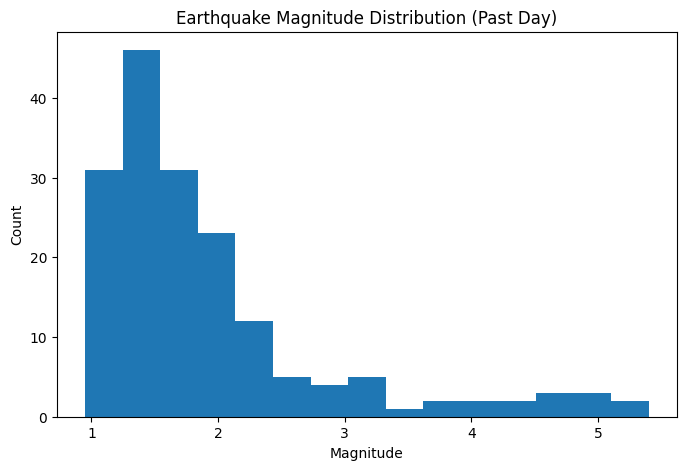

In [3]:
plt.figure(figsize=(8,5))
plt.hist(df["mag"], bins=15)
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.title("Earthquake Magnitude Distribution (Past Day)")
plt.show()

日本語サマリー（約300字）
この作品では、USGSが提供する最新の地震データを取得し、発生場所を地図上に可視化することで、地震の広がりや規模を直感的に理解できるようにした。特に、マグニチュードに応じて円のサイズを変えることで、インパクトの違いが視覚的にわかるよう工夫した。また、マグニチュード分布のヒストグラムを作成し、弱い揺れから比較的強い揺れまで、どの程度の地震が多いのかを把握することができた。今回の分析を通じて、地震活動が世界中で常に発生していることを改めて実感した。